# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [48]:
# Import your libraries:

%matplotlib inline
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import statsmodels.formula.api as smf

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [8]:
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [6]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [4]:
websites.keys()

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [11]:
# columns that contain feutures of the website
features = websites.drop(['Type'], axis='columns')
features.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2.0
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,17,7,4,1230,17,19,1265,1230,17,0.0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0,0,0,0,0.0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0


In [14]:
# what we will predict
y = websites['Type']
y

0       1
1       0
2       0
3       0
4       0
       ..
1776    1
1777    1
1778    0
1779    0
1780    0
Name: Type, Length: 1781, dtype: int64

In [ ]:
# Your comment here

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [24]:
websites.corr()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852


In [17]:
results = smf.ols('Type ~ URL_LENGTH + NUMBER_SPECIAL_CHARACTERS + CONTENT_LENGTH + TCP_CONVERSATION_EXCHANGE + DIST_REMOTE_TCP_PORT + REMOTE_IPS + APP_BYTES + SOURCE_APP_PACKETS + REMOTE_APP_PACKETS + SOURCE_APP_BYTES + REMOTE_APP_BYTES + APP_PACKETS + DNS_QUERY_TIMES', data=websites).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Type   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     35.85
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           4.84e-69
Time:                        17:31:47   Log-Likelihood:                -66.911
No. Observations:                 968   AIC:                             159.8
Df Residuals:                     955   BIC:                             223.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0208      0.025      0.823      0.410      -0.029       0.070
URL_LENGTH                   -0.0096      0.001    -10.923      0.000      -0.011      -0.008
NUMBER_SPECIAL_CHARACTERS     0.0544      0.005      9.921      0.000       0.044       0.065
CONTENT_LENGTH            -1.001e-06   2.46e-07     -4.074      0.000   -1.48e-06   -5.19e-07
TCP_CONVERSATION_EXCHANGE    -0.0364      0.102     -0.356      0.722      -0.237       0.164
DIST_REMOTE_TCP_PORT         -0.0135      0.002     -8.897      0.000      -0.016      -0.011
REMOTE_IPS                   -0.0082      0.004     -2.190      0.029      -0.016      -0.001
APP_BYTES                     0.0018      0.001      3.501      0.000       0.001       0.003
SOURCE_APP_PACKETS            0.0195      0.051      0.381      0.704      -0.081       0.120
REMOTE_APP_PACKETS            0.0020      0.002      0.950      0.343      -0.002       0.006
SOURCE_APP_BYTES          -2.581e-06   8.86e-07     -2.914      0.004   -4.32e-06   -8.43e-07
REMOTE_APP_BYTES             -0.0018      0.001     -3.511      0.000      -0.003      -0.001
APP_PACKETS                   0.0195      0.051      0.381      0.704      -0.081       0.120
DNS_QUERY_TIMES               0.1354      0.107      1.270      0.204      -0.074       0.345
==============================================================================
Omnibus:                      275.925   Durbin-Watson:                   1.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              649.126
Skew:                           1.538   Prob(JB):                    1.11e-141
Kurtosis:                       5.576   Cond. No.                     1.10e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.33e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<AxesSubplot:>

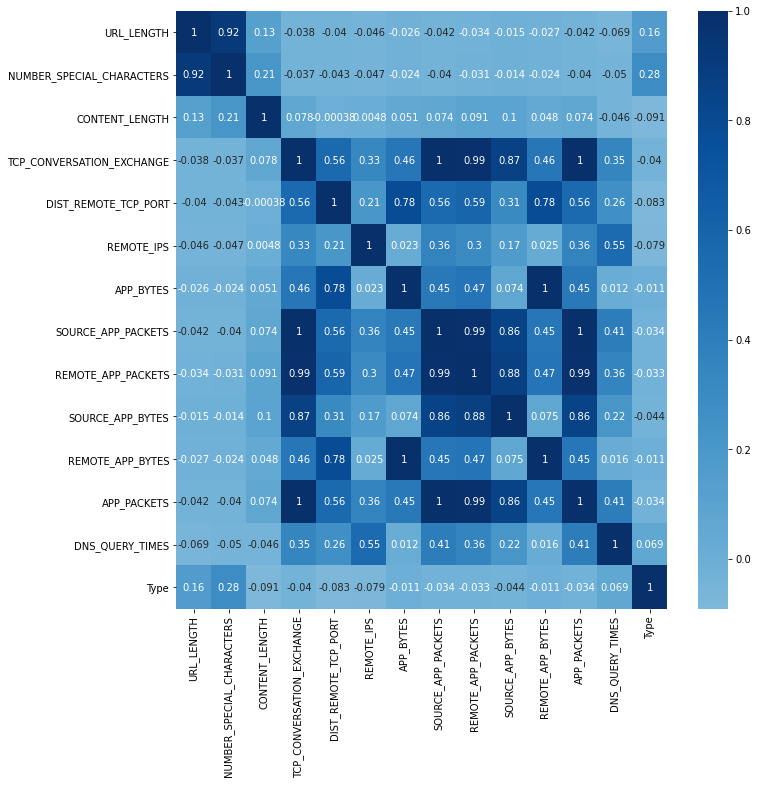

In [50]:
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(websites.corr(),center=0,  cmap='Blues', annot=True)

En este gráfico podemos ver:

* Todas las correlaciones que tienen las variables entre sí
* Gracias a la leyenda de colores podemos observar donde se encuentran las correlaciones más fuertes (el azul más fuerte) y las correlaciones más pequeñas (los azules más claros)
* Además, este mapa tambien nos proporciona la correlación exacta entre cada variable de manera numérica, para que sea más visual la manera de anañizar la conealidad de todas las columnas del dataset

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

#### 1º Eliminacion

In [54]:
# Voy a elimina la columna 'SOURCE_APP_PACKETS' que he visto que tiene una colinealidad de 1 con 'TCP_CONVERSATION_EXCHANGE'
eliminacion_1 = websites.drop(['SOURCE_APP_PACKETS'], axis='columns')

<AxesSubplot:>

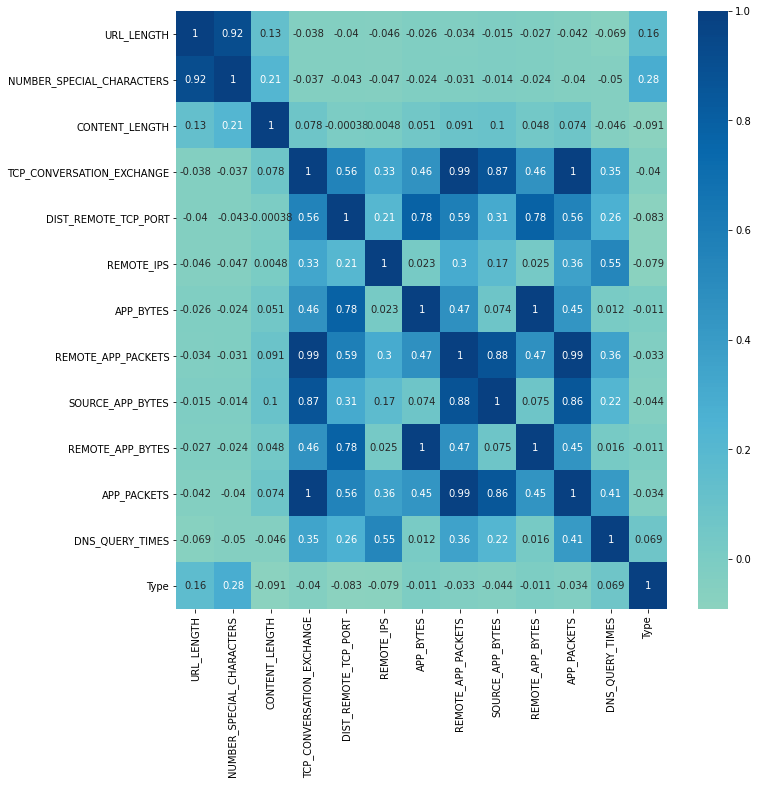

In [61]:
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(eliminacion_1.corr(),center=0,  cmap='GnBu', annot=True)

#### 2º Eliminacion

In [62]:
# Voy a eliminar la columna 'TCP_CONVERSATION_EXCHANGE' que he visto que tiene una colinealidad de 1 con 'APP_PACKETS'
eliminacion_2 = eliminacion_1.drop(['TCP_CONVERSATION_EXCHANGE'], axis='columns')

<AxesSubplot:>

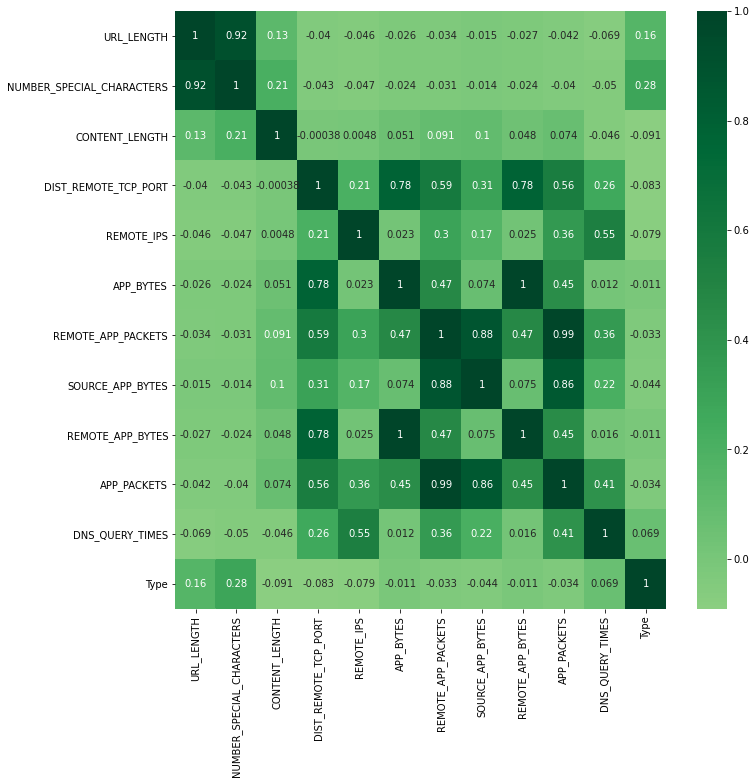

In [71]:
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(eliminacion_2.corr(),center=0,  cmap='YlGn', annot=True)

#### 3 Eliminacion

In [64]:
# Voy a eliminar la columna 'APP_BYTES' que he visto que tiene una colinealidad de 1 con 'REMOTE_APP_BYTES'
eliminacion_3 = eliminacion_2.drop(['APP_BYTES'], axis='columns')

<AxesSubplot:>

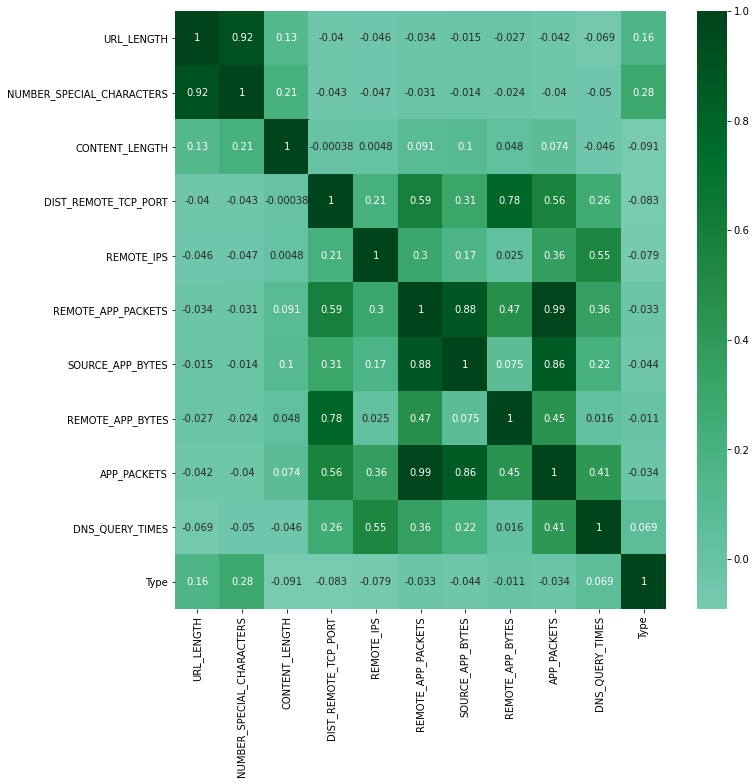

In [66]:
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(eliminacion_3.corr(),center=0,  cmap='BuGn', annot=True)


#### Comentarios
* Elimanando estas 3 columnas ya podemos observar en el mapa de calor que nos hemos quitado las 3 variables que mayor colinealidad tenían (colinealidad de 1)
* Personalmente, yo quitaria tambien dos columna más ya que tiene una colinealidad de más del 90%
    - NUMBER_SPECIAL_CHARACTERS
    - REMOTE_APP_PACKETS

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [ ]:
'''
Voy a partir de la ultima tabla que hemos conseguido al ir limpiando las variables/columnas con mayor colinialidad es decir del
dataframe --> eliminacion_3
'''

In [80]:
eliminacion_3.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [83]:
# Voy a eliminar la columna "CONTENT_LENGTH" ya que tiene un nº muy elevado de valores NAN

eliminacion_4 = eliminacion_3.drop(['CONTENT_LENGTH'], axis='columns')

In [84]:
# Y ahora solamente voy a elimanr las filas que contengan esos 2 valores nulos que nos quedan en nuestro df

eliminacion_5 = eliminacion_4.dropna()

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [85]:
# Examine missing values in each column

eliminacion_5.isnull().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

* Ya no tenemos ningun valor NAN asique podemos seguir

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [87]:
# Listamos los valores unicos de la columna WHOIS_COUNTRY

eliminacion_5["WHOIS_COUNTRY"].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [146]:
def country_codes(country):
    
    if country == 'Cyprus':
        country = 'CY'
    elif country == 'us':
        country = "US"
    elif country == 'se':
        country = 'SE'
    elif country == 'GB' or 'United Kingdom':
        country = 'UK'
        
    return country

In [147]:
eliminacion_5.WHOIS_COUNTRY = eliminacion_5.WHOIS_COUNTRY.apply(country_codes)

In [148]:
eliminacion_5["WHOIS_COUNTRY"]

0       UK
1       UK
2       UK
3       UK
4       UK
        ..
1776    UK
1777    UK
1778    UK
1779    UK
1780    UK
Name: WHOIS_COUNTRY, Length: 1779, dtype: object

#### LA HE LIADO Y HE SIDO INCAPAZ DE ARREGLARLO... ME SALE TODO UK :(

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [110]:
eliminacion_5["WHOIS_COUNTRY"].value_counts()

UK    1779
Name: WHOIS_COUNTRY, dtype: int64

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [ ]:
# Your code here


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [113]:
eliminacion_6 = eliminacion_5.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis='columns')
eliminacion_6.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,UK,0,2,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,UK,7,4,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,UK,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,UK,22,3,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,UK,2,5,62,129889,4586,61,4.0,0


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [117]:
eliminacion_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1779 non-null   object 
 1   URL_LENGTH                 1779 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 3   CHARSET                    1779 non-null   object 
 4   SERVER                     1779 non-null   object 
 5   WHOIS_COUNTRY              1779 non-null   object 
 6   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 7   REMOTE_IPS                 1779 non-null   int64  
 8   REMOTE_APP_PACKETS         1779 non-null   int64  
 9   SOURCE_APP_BYTES           1779 non-null   int64  
 10  REMOTE_APP_BYTES           1779 non-null   int64  
 11  APP_PACKETS                1779 non-null   int64  
 12  DNS_QUERY_TIMES            1779 non-null   float64
 13  Type                       1779 non-null   int64

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [118]:
eliminacion_7 = eliminacion_6.drop(['URL'], axis='columns')

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [119]:
eliminacion_7["CHARSET"].unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [120]:
eliminacion_7["SERVER"].unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

![Think Hard](../think-hard.jpg)

In [ ]:
# Your comment here
* Yo creo que la podriamos liampiar y reorganizar por empresas

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [131]:
def server_emp(empresa):
    if 'Microsoft' in empresa:
        return 'Microsoft'
    elif 'Apache' in empresa:
        return 'Apache'
    elif 'nginx' in empresa:
        return 'nginx'
    else:
        return 'Other'

In [129]:
eliminacion_7.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,iso-8859-1,nginx,UK,0,2,10,1153,832,9,2.0,1
1,16,6,UTF-8,Apache/2.4.10,UK,7,4,19,1265,1230,17,0.0,0
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,UK,0,0,0,0,0,0,0.0,0
3,17,6,ISO-8859-1,nginx,UK,22,3,37,18784,4380,39,8.0,0
4,17,6,UTF-8,None,UK,2,5,62,129889,4586,61,4.0,0


In [134]:
# Count `SERVER` value counts here

eliminacion_7["SERVER"] = eliminacion_7["SERVER"].apply(server_emp)

In [135]:
eliminacion_7["SERVER"].unique()

array(['nginx', 'Apache', 'Microsoft', 'Other'], dtype=object)

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

Estructura de get_dummies:

pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None


In [150]:
eliminacion_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1779 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 2   CHARSET                    1779 non-null   object 
 3   SERVER                     1779 non-null   object 
 4   WHOIS_COUNTRY              1779 non-null   object 
 5   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 6   REMOTE_IPS                 1779 non-null   int64  
 7   REMOTE_APP_PACKETS         1779 non-null   int64  
 8   SOURCE_APP_BYTES           1779 non-null   int64  
 9   REMOTE_APP_BYTES           1779 non-null   int64  
 10  APP_PACKETS                1779 non-null   int64  
 11  DNS_QUERY_TIMES            1779 non-null   float64
 12  Type                       1779 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage:

In [156]:
dummies = pd.get_dummies(eliminacion_7, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
dummies.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,DIST_REMOTE_TCP_PORT,REMOTE_IPS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,...,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Apache,SERVER_Microsoft,SERVER_Other,SERVER_nginx,WHOIS_COUNTRY_UK
0,16,7,0,2,10,1153,832,9,2.0,1,...,1,0,0,0,0,0,0,0,1,1
1,16,6,7,4,19,1265,1230,17,0.0,0,...,0,0,0,0,0,1,0,0,0,1
2,16,6,0,0,0,0,0,0,0.0,0,...,0,1,0,0,0,0,1,0,0,1
3,17,6,22,3,37,18784,4380,39,8.0,0,...,0,0,0,0,0,0,0,0,1,1
4,17,6,2,5,62,129889,4586,61,4.0,0,...,0,0,0,0,0,0,0,1,0,1


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [158]:
# No me sale ningun calor categorico!! que pasada!! pero no entiendo porque me apareces los valores unicos como nuevas columnas..
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1779 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 2   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 3   REMOTE_IPS                 1779 non-null   int64  
 4   REMOTE_APP_PACKETS         1779 non-null   int64  
 5   SOURCE_APP_BYTES           1779 non-null   int64  
 6   REMOTE_APP_BYTES           1779 non-null   int64  
 7   APP_PACKETS                1779 non-null   int64  
 8   DNS_QUERY_TIMES            1779 non-null   float64
 9   Type                       1779 non-null   int64  
 10  CHARSET_ISO-8859           1779 non-null   uint8  
 11  CHARSET_ISO-8859-1         1779 non-null   uint8  
 12  CHARSET_None               1779 non-null   uint8  
 13  CHARSET_UTF-8              1779 non-null   uint8

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [161]:
from sklearn.model_selection import train_test_split

X = dummies.drop('Type', axis=1)
y = dummies['Type']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=123)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [162]:
from sklearn.linear_model import LogisticRegression

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [169]:
# (max_iter=10000) --> esto lo ponemos porque sino nos sale este warning: "Increase the number of iterations (max_iter)"
# y porque en clase lo hemos utilizado jajaja

log = LogisticRegression(max_iter=10000)

log.fit(X = X_train,
        y = y_train)

LogisticRegression(max_iter=10000)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [175]:
# METRIX

from sklearn.metrics import confusion_matrix


dummies["prediction_type"] = log.predict(X)

y_pred = confusion_matrix(
    y_true = dummies.Type,
    y_pred = dummies["prediction_type"]
)



y_pred

array([[1536,   27],
       [ 106,  110]], dtype=int64)

In [181]:
# ACCURACY

from sklearn.metrics import accuracy_score

accuracy_score(
    y_true = dummies.Type,
    y_pred = dummies["prediction_type"])



0.925238898257448

What are your thoughts on the performance of the model? Write your conclusions below.

# Your conclusions here:
* Hemos calculado cuanto de bueno es el modelo
* Primero hemos sacado la "Confusion Matrix" en donde podemos ver una matriz cuantas predicciones hemos acertado y cuales no
* Y, con el accuracy hemos podido calcular el porcentaje de aciertos de nuestro modelo, un 92% porciento... no esta mal (pero esta no es la mejor manera de calcular el porcentaje de aciertos)


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [188]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV

n_neighbors = np.arange(1, 50)

model = KNeighborsClassifier()
parameter_space = {'n_neighbors': n_neighbors,
                   }

grid_search = GridSearchCV(model,
                           param_grid=parameter_space,
                           cv=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [187]:
# Matriz

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [185]:
# Accuaracy score
grid_search.best_score_

0.9283159375231328

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [192]:
grid_search = GridSearchCV(model,
                           param_grid=parameter_space,
                           cv=5)

In [193]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [194]:
grid_search.best_score_

0.9240845070422535

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

# Your conclusions here:
* Aunque hayamos cambiado la k de 3 a 5 la matriz se sigue manteniendo igual
* El accuracy score (es decir, el % de aciertos de nuestro modelo) es 4 centesimas mayor en el modelo con k = 3 que el modelo k = 5


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here